<a href="https://colab.research.google.com/github/tmdcks1103/Machine-Learning-Programming/blob/main/5%EC%A3%BC%EC%B0%A8/BMI_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD, RMSprop

df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [21]:
# Outcome 칼럼 제거
df = df.drop('Outcome', axis=1)

# 결측치 확인
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace] = df[cols_to_replace].replace(0, np.nan)

print("--- 0을 NaN으로 변환 후 결측치 개수 확인 ---")
print(df.isnull().sum())
print("-" * 30)

--- 0을 NaN으로 변환 후 결측치 개수 확인 ---
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64
------------------------------


In [22]:
df = df.fillna(df.median())

print("\n--- 결측치 처리 후 데이터 상태 확인 ---")
print(df.isnull().sum().sum(), "개의 결측치가 남아있습니다.") # 0이 나와야 정상
print("-" * 30)


--- 결측치 처리 후 데이터 상태 확인 ---
0 개의 결측치가 남아있습니다.
------------------------------


In [23]:
# 사용할 특징(Feature)과 타겟(Target)을 정의합니다.
target = 'BMI'
# [수정] target을 제외한 모든 컬럼을 특징으로 사용하도록 자동화
features = df.drop(target, axis=1).columns

In [24]:
# 데이터 입출력 분리
X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# 데이터 스케일링 수행

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # 학습 데이터에 맞춰 스케일러를 학습하고 변환
X_test = scaler.transform(X_test)     # 학습된 스케일러로 테스트 데이터를 변환

In [39]:
# 딥러닝 모델 구축

model = Sequential()

# 신경망

model.add(Dense(32, input_shape=(7,), activation='relu')) # 입력층 + 첫 번째 은닉층
model.add(Dense(64, activation='relu'))                   # 두 번째 은닉층
model.add(Dense(32, activation='relu'))                   # 세 번째 은닉층
model.add(Dense(1)) # 출력층: BMI 값을 예측하므로 뉴런 1개, 활성화 함수 없음


In [40]:
# 컴파일

model.compile(optimizer='rmsprop',    # 옵티마이저
              loss='mse',             # 손실 함수 (Mean Squared Error, 회귀 문제 표준)
              metrics=['mse', 'mae']) # 평가 지표 (MSE, MAE-Mean Absolute Error)

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# 모델 학습

# 학습 횟수(Epochs)를 50회로 늘려 충분한 학습을 유도합니다.
N_EPOCHS = 50

history = model.fit(x=X_train, y=y_train,
                    epochs=N_EPOCHS,
                    batch_size=32,
                    validation_data=(X_test, y_test))

print("\n모델 학습이 완료되었습니다.")

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1001.8270 - mae: 30.8739 - mse: 1001.8270 - val_loss: 863.9175 - val_mae: 28.6853 - val_mse: 863.9175
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 763.7568 - mae: 26.7787 - mse: 763.7568 - val_loss: 488.1357 - val_mae: 20.9143 - val_mse: 488.1357
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 423.3532 - mae: 18.9894 - mse: 423.3532 - val_loss: 206.7096 - val_mae: 12.4933 - val_mse: 206.7096
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 186.9819 - mae: 11.3803 - mse: 186.9819 - val_loss: 123.3002 - val_mae: 8.6957 - val_mse: 123.3002
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 123.0690 - mae: 8.5405 - mse: 123.0690 - val_loss: 115.9301 - val_mae: 7.8078 - val_mse: 115.9301
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.7421 - mae: 7.6964 - mse: 95.7421 - val_loss: 101.9698 - val_mae: 7.4392 - val_mse: 101.9698
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss

In [42]:
# 모델 평가

# 테스트 데이터로 모델의 최종 예측을 수행합니다.
y_pred = model.predict(X_test)

# [보완] 최종 성능을 MSE와 RMSE로 계산하여 출력 -> (필요한지?)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- 최종 모델 평가 결과 ---")
print(f"테스트 데이터의 MSE (평균 제곱 오차): {mse:.4f}")
print(f"테스트 데이터의 RMSE (평균 제곱근 오차): {rmse:.4f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

--- 최종 모델 평가 결과 ---
테스트 데이터의 MSE (평균 제곱 오차): 40.4927
테스트 데이터의 RMSE (평균 제곱근 오차): 6.3634


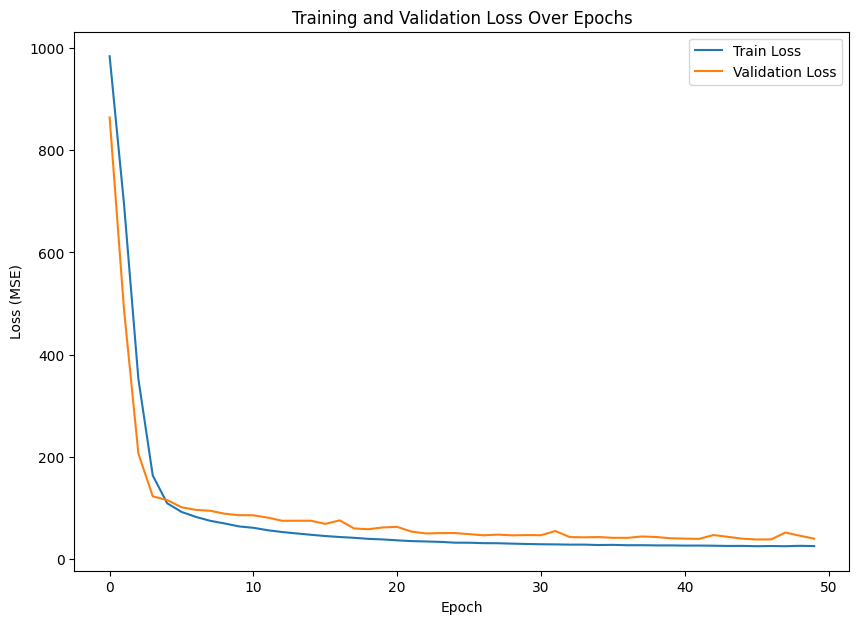

In [43]:
# 학습 과정에서의 손실(loss) 변화를 그래프로 시각화합니다.
plt.figure(figsize=(10, 7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='Train Loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()